
<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Bölüm 1` Veri Setine Genel Bakış ve Analiz


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.1** Google Drive ile Bağlantı Kurma


* Google Drive ile bağlantı kuralım ve veri setini aktaralım.

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

* Google Drive'dan dosya id'sini alarak yükledik.

In [ ]:
file_id = '1XHqEAeVsLIRCrhxEyT8mzSe1lPH8q-MT'
downloaded = drive.CreateFile({'id': file_id})

# Dosyayı Colabe indirelim.
downloaded.GetContentFile('tweet_data.csv')

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.2** Veri setini yükleyelim ve Analiz edelim.

* Veri analizi için pandas ve numpy'yi kullanacağız.

In [ ]:
import pandas as pd
import numpy as np

* Veri setini okuyarak data frame'e aktarıyoruz.

In [ ]:
df = pd.read_csv("tweet_data.csv")

* Sample metodu ile veriler arasından rastgele 10 adet örneği inceleyelim.

In [ ]:
df.sample(10)

#İlk Kolon text id'leri içeriyor.
#İkinci kolon Tweetleri, üçüncü kolonda duyguyu içeriyor.

* Tweetlerin toplam sayısını len fonksiyonu ile ekrana yazdıralım.


In [ ]:
print("Number of tweets: {}".format(len(df)))

#Veri setinde toplamda 18727 tweet mevcut.

* Bir tweeti ve bu tweetin duygusunu ekrana yazalım.

In [ ]:
#Belirli bir satırdaki tweeti yazdırmak için iloc metodunu kullanalım.

tweet_id = 4879
tweet = df.iloc[tweet_id]


In [ ]:
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet duygusu: {}".format("sentiment"))

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.3** Veri Setini Görselleştirme

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **1.3.1** Matplotlib</h4>

* Veri setini birde görsel olarak görelim.Bunun için matplotlib kütüphanesini import edelim.


In [ ]:
import matplotlib.pyplot as plt

* Pozitif ve Negatif Tweetlerin oranını Pie chart grafiğinde görelim.

In [ ]:
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count,labels=sentiment_count.index,
        autopct = '%1.1f%%',shadow=True,startangle=140)
plt.show()

#Tweetlerin %52.8'i pozitif, %47.2'si negatif tweetlerden oluşuyor.

* Pozitif ve Negatif Tweetlerin sayısını ekranda görelim.

In [ ]:
print("Pozitif Tweetlerin sayısı: {}".format(df[df["sentiment"]=="positive"].count()[0]))
print("Negatif Tweetlerin sayısı: {}".format(df[df["sentiment"]=="negative"].count()[0]))

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **1.3.2** Wordclouds

* Wordclouds sınıfı, bütün corpusta en çok tekrar eden kelimelerin çoğuna hızlı bir genel bakış elde etmek için çok kullanışlıdır.

In [ ]:
from wordcloud import WordCloud

* Pozitif Tweetlerde en çok geçen kelimeleri gösterelim.

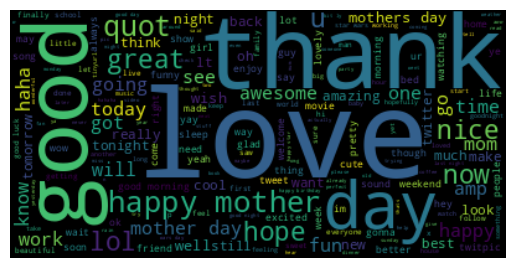

In [ ]:
pos_tweets = df[df["sentiment"]=="positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

#Şekilde Good,Thank,Love,Happy,Nice gibi kelimelerin pozitif tweetlerde çok sayıda geçtiğini görüyoruz.

* Negatif Tweetlerde en çok geçen kelimelere bakalım.



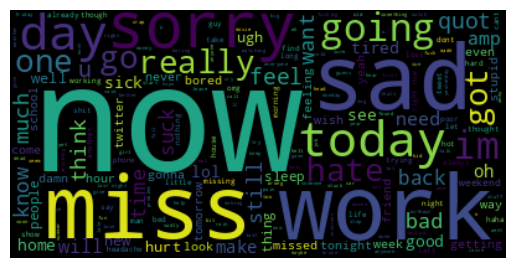

In [ ]:
pos_tweets = df[df["sentiment"]=="negative"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

#Şekilde Sad,Miss,Bad,Sorry,Sick gibi kelimelerin en çok geçtiğini görüyoruz.

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# Bölüm 2 Text Normalizasyon Aşaması

Regexi herhangi bir belirli ifadeyi yakalamak ve değiştirmek için kullanılırız.

* Regexi import edelim.

In [ ]:
import re

Bir tweeet örneğine bakalım.

In [ ]:
tweet = "RT @Outsider I love this! 👍 https://Outsider.com #NLP #Fun"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.1** RT - Retweet etiketi

* `R` : R karakteri
* `T` : T karakteri
* `\s` :Boşluk karakteri

* İlk olarak çok bir değeri olmayan retweet ile başlayalım. Silebiliriz ya da default bir değer ile değiştirebiliriz.

* Tweeti parametre olarak alan bir metot tanımlayalım.Metot return değeri olarak tweeting modifiye edilmiş halini gönderecek.
* Sub fonksiyonu ile tweetin yeni halini create edeceğiz.
* Metinde yer alna her RT'yi \s ile boşluk karakteriyle değiştireceğiz.


In [ ]:
def replace_retweet(tweet,default_replace=""):
  tweet = re.sub('RT\s+',default_replace,tweet)
  return tweet

In [ ]:
print("İşlenmiş Tweet: {}".format(replace_retweet(tweet)))

#RT'nin kaybolduğunu görüyoruz.

İşlenmiş Tweet: @Outsider I love this! 👍 https://Outsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.2** @User Tag yani Kullanıcı Etiketi

* `\w` : Bir kelime ile değiştirir.

* '@' etiketi ile başlayan stringleri bulacağız. Varsayılan bir kullanıcı etiketi "twitteruser" ile değiştireceğiz. Ancak metnin içinde @ ile başlayan eposta adresi olabilir.Buna dikkat etmek için \B 'yi ekleyeceğiz.
* Yine aynı şekilde bir tweeti alan ve modifiye eden bir metot oluşturacağız.

In [ ]:
def replace_user(tweet,default_replace="twitteruser"):
  tweet = re.sub('\B@\w+',default_replace,tweet)
  return tweet

In [ ]:
print("İşlenmiş Tweet: {}".format(replace_user(tweet)))

# Kullanıcı etiketini twitteruser ile değiştirdik.

İşlenmiş Tweet: RT twitteruser I love this! 👍 https://Outsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.3** Emojiler

* Emoji sınıfını yükleyelim.

In [ ]:
pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=ebdd21fc15cc91db3342de33f464152a4271ffce444f9d0f93700372c65ce29c
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji


* Emojiyi import edelim.

In [ ]:
import emoji

* Emojileri anlamlı metinlerle değiştirelim.
* Yine Tweeti input olarak alan ve modifiye edilen tweeti geri döndüren bir metot yazalım.
* Emoji sınıfından demoji metodu sayesinde emojiyi anlamına göre bir metinle değiştirecek.

In [ ]:
def demojize(tweet):
  tweet=emoji.demojize(tweet)
  return tweet

In [ ]:
print("İşlenmiş Tweet: {}".format(demojize(tweet)))

#👍 emojisi yerine thumbs up yazdı.

İşlenmiş Tweet: RT @Outsider I love this! :thumbs_up: https://Outsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.4** URL'ler

* `\S` : Boşluk karakteri hariç bir karakter.

* URL'ler güvenli olmayan Web sayfaları için http ve güvenlik sayfaları için https formlarında bulunurlar.
* Bunları aynı RT'de olduğu gibi yine ortadan kaldıracağız.

In [ ]:
def replace_url(tweet,default_replace=""):
  tweet=re.sub('(http|https):\/\/\S+',default_replace,tweet)
  return tweet

In [ ]:
print("İşlenmiş Tweet: {}".format(replace_url(tweet)))

#Görüldüğü gibi URL temizlendi.

İşlenmiş Tweet: RT @Outsider I love this! 👍  #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.5** Hashtagler

* Hasthag ile başlayan herhangi bir şeyin başındaki hashtag (#) simgesini kaldıracağız.

In [ ]:
def replace_hashtag(tweet,default_replace=""):
  tweet=re.sub('#+',default_replace,tweet)
  return tweet

In [ ]:
print("İşlenmiş Tweet: {}".format(replace_hashtag(tweet)))

İşlenmiş Tweet: RT @Outsider I love this! 👍 https://Outsider.com NLP Fun


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.2** Kelime Özellikleri
Twitter'a bağlı olmayan bazı diğer özelliklere bir göz atalım.

In [ ]:
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.1** Büyük harf kullanımını kaldırarak her harfi küçültelim.

* Tweeti input alan ve tweette yer alan her harfi küçülten bir metot yazalım.

In [ ]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [ ]:
print("İşlenmiş Tweet: {}".format(to_lowercase(tweet)))

İşlenmiş Tweet: looooooook at this ... i'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.2** Kelime tekrarı

* Sözcük tekrarlarını tek bir oluşumla değiştirelim. ("oooooo", "oo" olacak)
* Bu durumda olduğu gibi birçok karakter tekrarının kolay bir yolu var.
* 1+ diyerek tekrarlanan grubun herhangi çift harfle değişeceğini belirtiriz.
* İlk 1\, yakalama grubunun içeriğiyle eşleşeni belirtmek için kullanılır ve ikinci 1\, eşleşmeyi tek bir oluşumla değiştirmek için kullanılır.

In [ ]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+',r'\1\1',tweet)
  return tweet

In [ ]:
print("İşlenmiş tweet: {}".format(word_repetition(tweet)))
#Görüldüğü gibi LOOK'ta sadece 2 tane O kaldı.

İşlenmiş tweet: LOOK at this .. I'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.3** Noktalama tekrarı

* Noktalama tekrarlarını aynı harflerde olduğu gibi tek bir oluşumla değiştirelim. ("!!!!!" => "!" olacak)
* Eşleştirmek istediğimiz tüm farklılaşmaları bir ters eğik çizgi \n ile belirtebiliriz.

In [ ]:
def punct_repetition(tweet,default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])',default_replace,tweet)
  return tweet

In [ ]:
print("İşlenmiş Tweet: {}".format(punct_repetition(tweet)))

#.. şeklinde olan noktalardan sadece tek bir adet nokta kaldı.

İşlenmiş Tweet: LOOOOOOOOK at this . I'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.4** Kelime Daralması

* isn't, wasn't, won't şeklinde yer alan kısa kullanımları is not,was not,will not gibi açık halleriyle yazacağız.

* Bunun için Contractions sınıfını indirelim ve import edelim.

In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.7 MB/s eta 0:00:00


In [ ]:
import contractions

*`contractions_dict` ingilizcedeki çoğu kısaltmayı içeren bir sözlük yapısı.

In [ ]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

* Bu tür kısaltmaları kaldırması için iki şekilde metot yazabiliriz.Birisi uzun yol diğeri daha kısa bir yol.

In [ ]:
def _fix_contractions(tweet):
  for k,v in contractions.contractions_dict.items():
    tweet = tweet.replace(k,v)
  return tweet

In [ ]:
print("İşlenmiş Tweet: {}".format(_fix_contractions(tweet)))

İşlenmiş Tweet: LOOOOOOOOK at this ... I would like it so much!


* contractions.fix hazır metodu sayesinde bu işlemi kolayca yapabiliyoruz.

In [ ]:
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [ ]:
print("İşlenmiş Tweet: {}".format(fix_contractions(tweet)))

#I'd like ile yerine açık hali olan I would like'ı değiştirmiş olduk.

İşlenmiş Tweet: LOOOOOOOOK at this ... I would like it so much!


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.3** Tokenizasyon

* Tokenizasyon, karmaşık ve uzun cümleleri bilgisayarlar ve makine öğrenimi modelleri tarafından daha kolay anlaşılan daha küçük parçalara dönüştürmenin etkili bir yoludur.

* NLTK paketini yükleyelim.

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.1** Basit Tokenization

* nltk'yı ve word_tokenize modülünü import edelim.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tweet = "These are 5 different words!"

* Tokenizasyon işlemi yapan bir metot oluşturalım.
* word_tokenize modülü ile basit bir şekilde tokenizasyon işlemini gerçekleştirebiliyoruz.

In [ ]:
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens


* tokenize() fonksiyonu ile tweet'in tokenizasyon işlemine girdikten sonraki halini görebiliyoruz.
* Çıktı olarak tokenleri bir liste içinde görebiliyoruz.

In [ ]:
print(type(tokenize(tweet)))
print("Tweet tokenleri: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokenleri: ['These', 'are', '5', 'different', 'words', '!']


* Bazen bazı belirli öğeleri bir cümlede tutmak veya tersine, onlardan kurtulmak isteyebiliriz.
* Bunlar örneğin noktalama işaretleri, durma sözcükleri(stopwords) ve hatta bazı durumlarda sayılar için geçerlidir.

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.2** Özel Tokenizasyon

* String paketini import edelim.

In [ ]:
import string

* String paketi ile punctuation sayesinde var olan tüm noktalama işaretlerini alabiliriz.

In [ ]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


* NLTK'dan stopwords modülünü import edelim ve stopwordleri indirelim.
* Bu işlem sayesinde ingilizcede kullanılan tüm stopwordslere bir liste halinde erişebiliyoruz.


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

* Stopwordleri bir küme haline getirelim.

In [ ]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'me', 'had', 'with', 'some', 'on', 'hers', 'of', 'into', 'above', 'this', 'not', 'now', "weren't", 'as', 'my', 'after', 'hasn', "mustn't", 'those', "doesn't", 'here', 'because', 'theirs', 'o', 'all', 'don', "you'd", 'yours', 'ain', 'so', 'y', 'myself', 'then', 'weren', 'themselves', 'didn', 'from', 'shouldn', "should've", 'who', 'it', 'down', 'doing', 'that', 'ours', 'are', 'at', 'was', 'their', 'won', 'which', 'few', 'own', "didn't", 'under', 're', "mightn't", "hasn't", 'an', 'both', 'aren', 'about', 'be', 'if', 'once', 'you', 'll', 'where', 'a', 'does', 'mustn', 'most', 'or', 'doesn', 'his', 'do', 'hadn', "you'll", 'am', 'while', 'each', 'wouldn', 'more', 'did', "shan't", 'its', "you've", 'nor', 'through', 't', 'them', 'needn', 'in', 'can', 'until', 'further', 'only', 'i', 'between', "aren't", 'himself', 'when', 'other', "don't", 'and', 'any', 'isn', 'to', 'were', 'itself', 'what', 'has', 'ma', 'up', 'whom', "that'll", "you're", 'been', 'yourself', 'shan', "couldn't", 'will', 'too',

* Kümeden bazı stopwordleri çıkartalım. Çünkü "not" gibi bir kelime cümlenin anlamını olumsuz yönde değiştirebilir. O yüzden cümleden çıkartmak çok yanlış olur.
* Discard fonksiyonu ile kümeden çıkartalım. Bu sayede artık not kelimesi cümleden atılmayacak.

In [ ]:
stop_words.discard('not')
print(stop_words)

{'me', 'had', 'with', 'some', 'on', 'hers', 'of', 'into', 'above', 'this', 'now', "weren't", 'as', 'my', 'after', 'hasn', "mustn't", 'those', "doesn't", 'here', 'because', 'theirs', 'o', 'all', 'don', "you'd", 'yours', 'ain', 'so', 'y', 'myself', 'then', 'weren', 'themselves', 'didn', 'from', 'shouldn', "should've", 'who', 'it', 'down', 'doing', 'that', 'ours', 'are', 'at', 'was', 'their', 'won', 'which', 'few', 'own', "didn't", 'under', 're', "mightn't", "hasn't", 'an', 'both', 'aren', 'about', 'be', 'if', 'once', 'you', 'll', 'where', 'a', 'does', 'mustn', 'most', 'or', 'doesn', 'his', 'do', 'hadn', "you'll", 'am', 'while', 'each', 'wouldn', 'more', 'did', "shan't", 'its', "you've", 'nor', 'through', 't', 'them', 'needn', 'in', 'can', 'until', 'further', 'only', 'i', 'between', "aren't", 'himself', 'when', 'other', "don't", 'and', 'any', 'isn', 'to', 'were', 'itself', 'what', 'has', 'ma', 'up', 'whom', "that'll", "you're", 'been', 'yourself', 'shan', "couldn't", 'will', 'too', 'might

* Artık tokenizasyon işlemine hazırız.
* Bunun için tokenizasyon fonksiyonu oluşturalım.

In [ ]:
#Yine tokenize fonksiyonu kullarak tokenlerin bir listesini alıyoruz.
#Hangi tokenlerin kalacağına veya kalmayacağına karar vereceğiz.

#keep_punct'ın False olması noktalama işaretlerini istemiyoruz demektir.

#Alnum, sayılar ve harfleri temsil ediyor. False yaptığımızda sayılar dahil olmayacak.
#Eğer true yapsaydık sayılarıda token listesinde tutacaktı.

def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  token_list = word_tokenize(tweet)

  #Token listesinden noktalama işaretlerini atalım.
  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]
  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]

  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list


* Fonksiyonu bir tweet ile 3 farklı şekilde test edelim.

In [ ]:
tweet = "these are 5 different words!"

In [ ]:
#İlkinde noktalama işaretleri, sayılar ve stopwordler True olarak gönderildiğinden tüm hepsini yazdı.

#İkinci örnekte noktalama işaretleri ve sayılar default olarak false olduğu için onları kaldırdı, stopwordler kaldı.

#Üçüncü örnekte ise sayıları tutmak için True olarak gönderdi. Noktalamala işaretleri ve stopwordler kaldırıldı.

#Cümledeki stopwordler: These ve are

print("Tweet tokens: {}".format(custom_tokenize(tweet,
                                                keep_punct=True,
                                                keep_alnum=True,
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['these', 'are', '5', 'different', 'words', '!']
Tweet tokens: ['these', 'are', 'different', 'words']
Tweet tokens: ['5', 'different', 'words']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.4** Stemming

* Stemming için bazı kütüphaneleri ve modülleri import edelim.

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

* Stemming yapacağımız tokenlerin listesi.

In [ ]:
tokens = ["manager", "management", "managing"]

* Daha sonra, her bir stemmer için bir tane olmak üzere değişkenler oluşturabilir ve bunları az önce yüklediğimiz farklı modüllerle atayabiliriz.

In [ ]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snoball_stemmer = SnowballStemmer('english')

* Parametre olarak Token listesini alan ve stemming işleminden geçen tokenları geri döndüren bir metot oluşturalım.

In [ ]:
#Boş bir liste oluşturup stemming yapılan tokenleri ekliyoruz.

def stem_tokens(tokens,stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

* Farklı Stemming yöntemleriyle stemming yapılmış tokenleri karşılaştıralım.

In [ ]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

#Porter stemmer ve Snowball stemmer aynı sonuçları üretti.
#Lancaster stemming, Porter stemming yönteminden daha agresif bir şekilde kelime köklerini çıkarmak için kullanılır.
#Ancak, Lancaster stemming yönteminin dezavantajları da vardır.
#Çok agresif bir yöntem olduğu için, kelime köklerini yanlış şekilde kestirebilir ve kelimenin anlamını değiştirebilir.


Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.5** Lemmatizasyon

* Lemmatizasyon için kütüphaneleri ve modülleri import edelim.
*WordNet, Princeton Üniversitesi tarafından geliştirilen çok geniş bir sözcük veri tabanıdır.
*200'den fazla dilde binlerce kelimeyi kapsar ve lemmatizasyon yetenekleri sunar

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

* Lemmatizasyon yapacağımız tokenlerin listesini oluşturalım.

In [ ]:
tokens = ["international", "companies", "had", "interns"]

* Kelimeleri isim,sıfat,fiil şeklinde sözcük türlerine ayıralım.

In [ ]:
word_type = {"international": wordnet.ADJ,
             "companies": wordnet.NOUN,
             "had": wordnet.VERB,
             "interns": wordnet.NOUN
             }

* WordNet modülünden lemmatizer fonksiyonunu kullanalım.

In [ ]:
lemmatizer = WordNetLemmatizer()

* Tokenleri parametre olarak alan ve lemmatizasyon işleminden geçirip geri döndüren bir metot oluşturalım.

In [ ]:
def lemmatize_tokens(tokens,word_type,lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token,word_type[token]))
  return token_list

In [ ]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


* Yaptığımız tüm normalizasyon işlemlerini tek bir metotta tanımlayalım.

In [ ]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Tweetin ilk hali: {}".format(tweet))

  ## Twitter Özellikleri
  tweet = replace_retweet(tweet) # Retweet için olan kısım
  tweet = replace_user(tweet, "") # Kullanıcı etiketi
  tweet = replace_url(tweet) # Url'leri içeren kısım
  tweet = replace_hashtag(tweet) # Hashtagler için olan kısım
  if verbose: print("Twitter işlemlerinden sonra tweet: {}".format(tweet))

  ## Kelime Özellikleri
  tweet = to_lowercase(tweet) # Harfleri küçültmek için
  tweet = fix_contractions(tweet) # Kısaltmalar için
  tweet = punct_repetition(tweet) # Noktalama işaretlerinin tekrarı için
  tweet = word_repetition(tweet) # kelime tekrarını için
  tweet = demojize(tweet) # Emojileri değiştirmek için
  if verbose: print("Kelime işlemlerinden sonra tweet: {}".format(tweet))

  ## Tokenizasyon & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenizasyon
  stemmer = SnowballStemmer("english") # Stemmerı tanımlayalım.
  stem = stem_tokens(tokens, stemmer) # stemming tokenleri

  return stem

* Duygu analizi için yeterince hızlı ve etkili olduğu için Lemmatizasyon yerine Stemmingi kullanacağım.

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Bölüm 3` Metnin Yeniden Temsili </h2>

* Scikit-Learn kütüphanesini indirelim.
* Scikit-Learn çeşitli sınıflandırma,regresyon ve kümeleme algoritmaları içeren bir makine öğrenmesi kitaplığıdır.

In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* Veri setine 2 yeni kolon ekleyelim.İlki tweetin tokenlere ayrılmış hali.
* İkinci ekleyeceğimiz kolonda, Tweet eger pozitifse 1, negatif ise 0 olarak ekleyelim. Bu sayede 1 ve 0'lar bilgisayar tarafından kullanılabilecek.


In [ ]:
df["tokens"] = df["tweet_text"].apply(process_tweet)
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1
                                              if i == "positive" else 0)
df.head(10)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, call]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[not, go, prom, bf, not, like, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmm],0
5,1956969035,@charviray Charlene my love. I miss you,negative,"[charlen, love, miss]",0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,"[sorri, least, friday]",0
7,1956969531,Choked on her retainers,negative,"[choke, retain]",0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,"[ugh, beat, stupid, song, get, next, rude]",0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,"[watch, hill, london, realis, tourtur, week, w...",0


* Şimdi data frame'i girdiler ve çıktılar olarak iki listeye ayıralım.

* İlki tweet tokenlerini içeren liste : X
* İkincisi duyguları içeren liste : Y







In [ ]:
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [ ]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['annoy', 'start', '

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.2** Pozitif/Negatif Frekanslar

* İlk olarak Pozitif/Negatif Frekanslar tekniğini kullanacağız.

In [ ]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

sentiment = [1, 0, 1, 1, 0, 0]

* İndeks olarak kelime,duygu ve değer olarak bu belirli duygu içindeki oluşum ile bir sözlük olarak saklanacak olan frekans tablomuzu oluşturmamız gerekiyor.


* Tweetlerin listesini ve duygularını bir metot oluşturalım.
* Geriye Frekansları sözlük halinde döndürecek.


<table style="width:100%">
  <tr>
    <th>Word</th>
    <th>Positive</th>
    <th>Negative</th>
  </tr>
  <tr>
    <td>love</td>
    <td>dict[(love, 1)]</td>
    <td>dict[(love, 0)]</td>
  </tr>
  <tr>
    <td>lost</td>
    <td>dict[(lost, 1)]</td>
    <td>dict[(lost, 0)]</td>
  </tr>
  <tr>
    <td>happy</td>
    <td>dict[(happy, 1)]</td>
    <td>dict[(happy, 0)]</td>
  </tr>
</table>


In [ ]:
#Boş bir sözlük oluşturalım.
#Tweetleri ve duyguları döngü içinde alalım.
#Tweetten tek tek sözcükleri alıyoruz.
#Aldığımız sözcükleri duygularla eşleştiriyoruz.
#Örneğin güzel kelimesini pozitif gibi.
#Eğer sözlüğümüzde bu kelime daha önce geçmişse 1 artırıyoruz.
#Geçmemişse sözlüğe 1 olarak ekliyoruz.

def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs

* Frekans sözlüğümüzü corpus ve duyguları göndererek oluşturalım.

In [ ]:
freqs = build_freqs(corpus, sentiment)

In [ ]:
print(freqs)

# Sözlüğümüz index olarak kelimeyi ve duyguyu, value yani değer olarak ise frekansı içeriyor.
# Örneğin i kelimesi pozitif tweetlerde 2 kere, negatif tweetlerde 3 kere geçmiş.

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}


* Tüm veri setine dayalı olarak bir frekans sözlüğü oluşturalım.

In [ ]:
freqs_all = build_freqs(X, y)

* Love kelimesinin pozitif ve negatif tweetlerde kaçar kez geçtiğine bakalım.
* Love kelimesi 1358 kez pozitif tweetlerde karşımıza çıkarken, yalnız 67 kez negatif tweetlerde karşımıza çıkmış

In [ ]:
print("Love kelimesinin pozitif tweetlerde frekansı: {}".format(freqs_all[("love", 1)]))
print("Love kelimesinin negatif tweetlerde frekansı: {}".format(freqs_all[("love", 0)]))

Love kelimesinin pozitif tweetlerde frekansı: 1358
Love kelimesinin negatif tweetlerde frekansı: 67


* Frekans sözlüğünü kullanarak tweetleri 2 boyutlu diziye çeviren bir metot oluşturalım.

In [ ]:
#Diziyi yeni veya bilinmeyen tweetler olabileceği için öncelikle 0 olarak başlatıyoruz.
#Sonra tweetteki her kelimeyi döngüye alıyoruz.
#Ve kelimelerin sözlükte pozitif bir duyguyla görünüp görünmediğini kontrol ediyoruz.
#Eğer böyleyse yeni dizimizin birinci boyutuna sözlükte var olan oluşum türünü ekleyebiliriz.
#Aynı şeyi negatif durum içinde yapıyoruz.
#Eğer kelime negatifse bunu dizimizin 2.boyutuna ekliyoruz.

def tweet_to_freq(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    if (word, 1) in freqs:
      x[0] += freqs[(word, 1)]
    if (word, 0) in freqs:
      x[1] += freqs[(word, 0)]
  return x

* Bu şekilde, tweetteki her kelimeye baktık, kelimenin corpusta pozitif ve negatif tweet'lerinde ne sıklıkta geçtiğini ve bazılarının dizimizdeki sonucunu kontrol ettik.

* Oluşturduğumuz tweet_to_freqs fonksiyonu ve corpus sözlüğümüzle 2 boyutlu vektör oluşturalım.

In [ ]:
print(tweet_to_freq(["i", "love", "nlp"], freqs))

#I kelimesi corpusumuzda 2 kez pozitif tweetlerde, 3 kezde negatif tweetlerde yer alıyordu.
#Love kelimesi 2 kez pozitif tweetlerde yer alırken negatif tweetlerde hiç yer almıyordu.
#Nlp kelimesi ise 1 kez pozitif tweetlerde yer alırken yine negatif tweetlerde hiç yer almıyordu.

#İlk boyutta 2+2+1 = 5, İkinci boyutta ise 3+0+0 = 3

#Vektörümüz [5,3] şeklinde olacaktır.

[5. 3.]


* Bütün veri setini kullanarak bu kelimeleri 2 boyutlu vektör şeklinde görelim.

In [ ]:
print(tweet_to_freq(["i", "love", "nlp"], freqs_all))

[1358.   67.]


* Bir grafik üzerinde 2 kelimenin nerelerde gözüktüğüne bakalım.

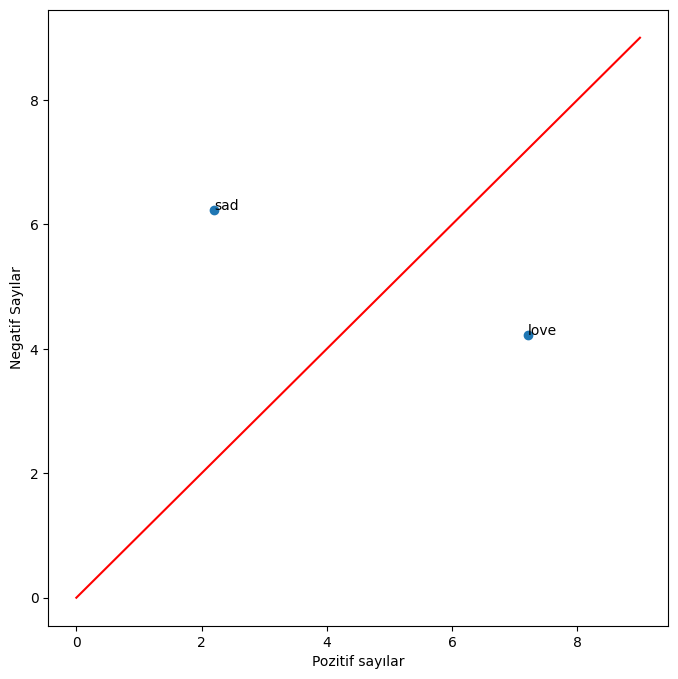

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))

word1 = "love"
word2 = "sad"

def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)

plt.xlabel("Pozitif sayılar")
plt.ylabel("Negatif Sayılar")

ax.plot([0, 9], [0, 9], color = 'red')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.3** Kelime Çantası

* 2.olarak Kelime Çantası tekniğini kullanacağız.
* Tweetlerden oluşan bir corpus oluşturalım.

In [ ]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Scikit-Learn Kütüphanesinden CountVectorizer'ı import edelim.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

* Corpusta vektörizasyon yapabilmek için bir metot oluşturalım.

In [ ]:
#CountVectorizer ile basit bir şekilde vektörizasyon yapabiliyoruz.
#2 lambda kullanıyoruz. İlki ön işleme için, diğeri tokenizasyon işlemi için.

def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

* Oluşturduğumuz fonksiyona corpusu vererek vektörizasyon işlemini yapalım.

In [ ]:
cv_vect = fit_cv(corpus)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Vektörizasyon sonucu oluşan featureları alalım ve ft'de tutalım.

In [ ]:
ft = cv_vect.get_feature_names_out()

In [ ]:
print("Bu corpusta {} adet feature mevcut".format(len(ft)))
print(ft)

#Görüldüğü gibi, corpusta bulunan farklı benzersiz kelimeleri temsil eden 13 özellik vardır.

Bu corpusta 13 adet feature mevcut
['am' 'computer' 'happy' 'hate' 'i' 'lost' 'love' 'miss' 'my' 'nlp' 'sad'
 'so' 'you']


* Corpusu vectorizer kullanarak bir matrise dönüştürelim.

In [ ]:
cv_mtx = cv_vect.transform(corpus)

* Matrisin boyutunu görelim.

In [ ]:
print("Matrix shape is: {}".format(cv_mtx.shape))

#Matrisin boyutunda ilki tweet sayısı,ikinici ise corpusta geçen benzersiz kelimeler.

Matrix shape is: (6, 13)


* Matrisi bir dizi haline getirelim.

In [ ]:
cv_mtx.toarray()

#Dizinin 3.satırında 0 0 0 3 0 0 1 0 0 0 0 olduğunu görüyoruz.
#Corpusta yer alan 3.tweette hate hate hate love kelimeleri geçiyor.
#3 kez hate ve 1 kez love

#Yukarıda featurelara baktığımızda hate 4.sütunda yer alıyordu.Love ise 7.sütunda yer alıyordu.
#Bu yüzden 3.satırın 4.sütunu 3 ve 3.satırın 7.sütunu 1.

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]])

* Yeni bir tweeti vectorizer kullanarak diziye dönüştürelim.

In [ ]:
new_tweet = [["lost", "lost", "miss", "miss"]]
cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]])

In [ ]:
unknown_tweet = [["John", "drives", "cars"]]
cv_vect.transform(unknown_tweet).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.4** Terim Frekansı ve Ters Döküman Frekansı (TF-IDF)

* Yine corpusu oluşturalım.

In [ ]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Scikit-Learn kütüphanesinden TfidfVectorizer'i import edelim.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

* Corpus ile TF-IDF vektörleştiriciyi oluşturmak için bir fonksiyon oluşturalım.
* Yine 2 lambda kullanıyoruz. İlki ön işleme için, diğeri tokenizasyon işlemi için.

In [ ]:
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

* Vektörizazyon işlemi için corpusu oluşturduğumuz fonksiyona verelim.
* Dönüştürülmüş matriside tf_mtx değişkeninde tutalım.

In [ ]:
tf_vect = fit_tfidf(corpus)
tf_mtx = tf_vect.transform(corpus)

* Vektörleştiricinin featurelarını görelim yani matrisin sütunlarını.

In [ ]:
ft = tf_vect.get_feature_names_out()

In [ ]:
print("Bu corpusta {} adet feature bulunmaktadır.".format(len(ft)))
print(ft)

Bu corpusta 13 adet feature bulunmaktadır.
['am' 'computer' 'happy' 'hate' 'i' 'lost' 'love' 'miss' 'my' 'nlp' 'sad'
 'so' 'you']


* Matrisin boyutunu görelim.

In [ ]:
print(tf_mtx.shape)

(6, 13)


* Matrisi diziye dönüştürelim.

In [ ]:
tf_mtx.toarray()

#Dizide 0-1 arasında decimal sayılar var.

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

* Decimal sayıların kullanılması, bir kelimenin metindeki önemini daha hassas bir şekilde belirlememize yardımcı olur. Örneğin, bir kelime belirli bir metinde çok sık kullanılıyorsa, ona daha yüksek bir decimal değer atanır ve böylece o kelimenin Bag of Words matrisindeki ağırlığı artar. Böylece, kelimenin önemi daha doğru bir şekilde yansıtılır ve metnin duygu analizi veya diğer doğal dil işleme uygulamaları için daha verimli bir şekilde kullanılabilir.


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Bölüm 4` Duygu Analizi Modeli

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.1** Train/Test Verilerinin ayrımı

* X ve Y yani girdi ve çıktılar nasıl görünüyor bakalım.

In [ ]:
print(X)
print(y)

#Bu değerleri bir önceki bölümde oluşturmuştuk.Artık bunları vektörizasyon işleminde kullanabiliriz.
#X'de tweetler tokenler halinde geldi.
#Y'de ise duygular var.

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['annoy', 'start', '

* Scikit-Learn kütüphanesinden train_test_split fonksiyonunu import edelim.
* Bunu, verileri train ve test olarak ayırırken kullanacağız.
* İlk olarak modeli train verileriyle eğiteceğiz, ikinci olarak test verileriyle test edeceğiz.Buna göre modelin performansını ölçeceğiz.

In [ ]:
from sklearn.model_selection import train_test_split

* Verilerin %80'ini train olarak seçtim geri kalan %20'de test verileri oldu.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    train_size=0.80)

* Train ve Test verilerinin boyutlarını görelim.

In [ ]:
print("X_train'in boyutu: {}".format(len(X_train)))
print("y_train'in boyutu: {}".format(len(y_train)))
print("\n")
print("X_test'in boyutu: {}".format(len(X_test)))
print("y_test'in boyutu: {}".format(len(y_test)))
print("\n")
print("Train veri oranı: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

X_train'in boyutu: 14981
y_train'in boyutu: 14981


X_test'in boyutu: 3746
y_test'in boyutu: 3746


Train veri oranı: 80%


* Rastgele tweetler getirelim ve her şey beklendiği gibi mi bakalım.

In [ ]:
import random
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Duygu: {}".format(y_train[id]))

Train tweet: ['hope', 'one', 'day', 'abl', 'go', 'date', 'year', 'old', 'boyfriend', 'without', 'parent']
Duygu: 1


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.2** Lojistik Regresyon

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.2.1** Model

* 3 Adet model oluşturacağız ve hangisi en iyi performans metriklerine sahip ona bakacağız.

* Lojistik regresyonu import edelim.

In [ ]:
from sklearn.linear_model import LogisticRegression

* Model oluşturan ve eğiten bir fonksiyon oluşturalım.

In [ ]:
#LogisticRegresyon ile modeli tanımlıyoruz.
#Modele X_train ve y_train'i vererek eğitiyoruz.
#Model, girdi ve çıktılar arasındaki ilişkiyi öğreniyor.

def fit_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px>  **4.2.2** Pozitif/Negatif Frekans

* 3.Bölümde oluşturduğumuz Build_freqs fonksiyonunu train verisinde kullanarak frekans sözlüğü oluşturalım.
* Yalnızca train verisini kullanarak oluşturuyoruz,bunun sebebi modelin yalnızca eğitim verileri üzerinde eğitilmesi gerektiğinden veri sızıntısını önlemek içindir.

* Oluşturduğumuz frekans sözlüğünü tweet_to_freq fonksiyonu ile kullanarak X_train ve X_test verilerini bir önceki bölümde yaptığımız gibi 2 boyutlu vektörlere dönüştürelim.

In [ ]:
freqs = build_freqs(X_train, y_train)
X_train_pn = [tweet_to_freq(tweet, freqs) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet, freqs) for tweet in X_test]

* fit_lr fonksiyonunu kullanarak vektörizasyon işleminden geçen x_train verileriyle modeli eğitelim.

In [ ]:
model_lr_pn = fit_lr(X_train_pn, y_train)

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.2.3** Kelime Çantası

* fit_cv fonksiyonunu train verileri üzerinde kullanarak Kelime çantası vektörizasyon yöntemini kullanalım.
* Bu yöntemle X_train ve X_test verilerini vektör haline dönüştürelim.

In [ ]:
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Oluşturduğumuz bu Lojistik regresyon modelini fit_lr kullanarak eğitelim.

In [ ]:
model_lr_cv = fit_lr(X_train_cv, y_train)

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.2.4** TF-IDF

* Şimdi TF-IDF yöntemini kullanacağız.
* Vektörizasyon yöntemiyle oluşturulan yeni x_train ve x_testi tekrar eğiteceğiz.

In [ ]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Modeli fit_lr fonksiyonuyla eğitelim.

In [ ]:
model_lr_tf = fit_lr(X_train_tf, y_train)

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.3** Performans Metrikleri ve Değerlendirme

* Accuracy score ve Confusion matrix'i Scikit-Learn'den import edelim.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.3.1** Pozitif/Negatif Frekans

* Öyleyse yeni bir y tahmin değişkeni oluşturalım ve modelimizi test edelim.Bunu predict fonksiyonuyla kolaylıkla yapıyoruz.



In [ ]:
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)

* Tahmin edilen duyguları gerçek duygularla karşılaştırarak modelin accuracy'sini ölçelim.

In [ ]:
print("Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

#Bu teknikte Accuracy 77.92 çıktı.Diğer tekniklerde daha iyi olabilir mi ona bakalım.

Accuracy: 77.92%


In [ ]:
# Karmaşıklık matrisini çizdirmek için metot oluşturalım.

import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Tahmin")
  plt.ylabel("Gerçek Değer")
  plt.title("Confusion Matrix")
  return sn

* Confusion matrixi görelim.

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

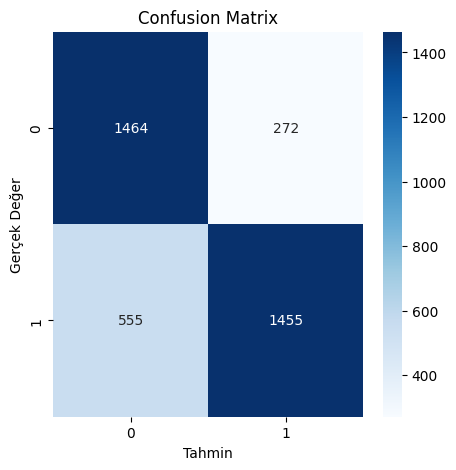

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.3.2** 2.Yöntem Kelime Çantası

* Kelime Çantası tekniğini kullanarak accuracy hesaplayalım.


In [ ]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

* Accuracy'ye bakalım.

In [ ]:
print("Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

#Kelime çantası yöntemini kullanarak accuracy 88.55 oldu.

Accuracy: 88.55%


* Burada oluşan karmaşıklık matrisini görelim.

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

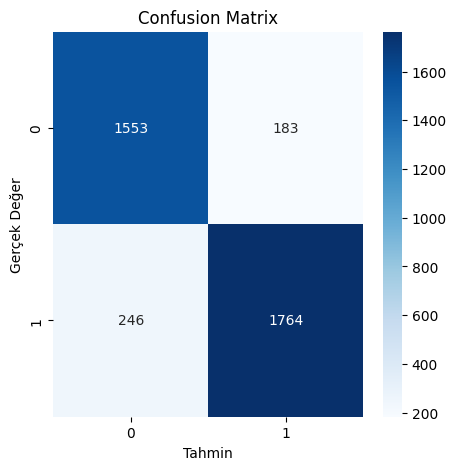

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

#Görüldüğü üzere Kelime çantası yönteminde True Positive ve True Negative'ler oldukça yüksekken
#False Negatif ve False Pozitif değerleri önceki tekniğe kıyasla daha düşük.

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.3.3** TF-IDF

* TF-IDF yöntemini kullanarak accuracy hesaplayalım.



In [ ]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

* Accuracy'yi görelim.

In [ ]:
print("Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

Accuracy: 88.65%


* Accuracy, Pozitif Negatif Frekans tekniğinde 77.92 çıkarken Kelime çantası ve TF-IDF yöntemlerinde %88 civarlarında çıktı.
* Bu durumda Duygu analizi alanında Kelime Çantası veya TF-IDF yöntemlerini kullanmak daha yüksek oranda başarı sağlayacaktır.

* Karmaşıklık matrisini görelim.

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

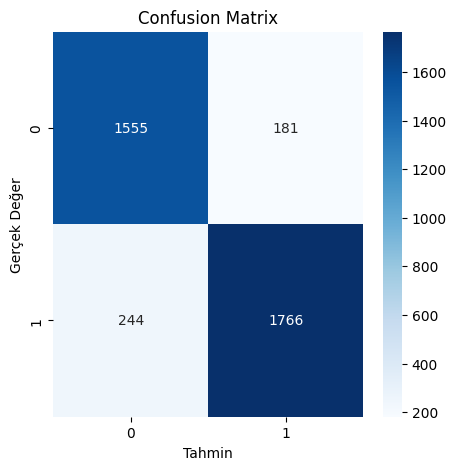

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

## **4.4** Kendi yazdığımız tweetler ile deneme yapalım.


* Kendimiz bir tweet yazarak modelin çalışmasını test edelim.

In [ ]:
tweet1 = "I realized that I hate you"
tweet2 = "Sun is up. Lets go to the park and enjoy it."
tweet3 = "Dr.Fahrettin Horasan is one of the best teacher in Kırıkkale University"
tweet4 = "Text mining is very interesting subject.I want to know more about it."
tweet5 = "Kırıkkale University trains qualified engineers.I totally enjoy being here"
tweet6 = "This watch is very beautiful.I really loved it"

* Tweet tahmin etmek için bir metot oluşturalım. Metotta ön işleme, dönüştürme ve tahmin aşamaları olacak.

In [ ]:
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Tahmin: Pozitif"
  else:
    return "Tahmin: Negatif"

* Fonksiyona tweeti gönderelim ve tahmini görelim.

In [ ]:
predict_tweet(tweet1)

'Tahmin: Negatif'